In [1]:
pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/a3/89/f5cca6e299320e19194ad09f6014db33208a49e8d9161e729725eb17f8a8/shap-0.44.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   -- ------------------------------------ 30.7/450.3 kB 660.6 kB/s eta 0:00:01
   ------------- -------------------------- 153.6/450.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------- ----- 389.1/450.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 450.3/450.3 kB 2.8 MB/s eta 0:00:00


Unique values in Disease: ['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Artery Disease' 'Eating Disorders (Anorexia,...' 'Fi

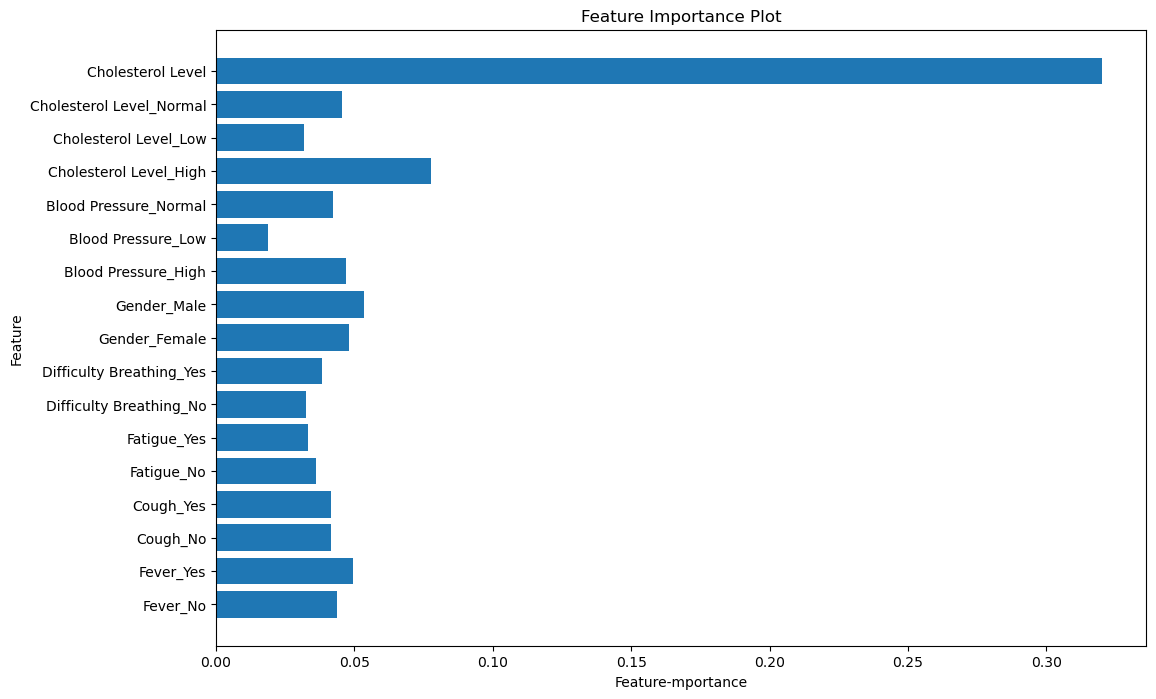

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


file_path = "Disease_symptom_and_patient_profile_dataset.csv"
df = pd.read_csv(file_path)

# To identify non-numeric values by checking the unique values in each column
for col in df.select_dtypes(include=['object']):
    print(f"Unique values in {col}: {df[col].unique()}")

# Conversion of outcome variable to the numeric value
df['Outcome Variable'] = df['Outcome Variable'].map({'Positive': 1, 'Negative': 0})
df = df.drop(columns=['Disease'])

# Splitting the data into feature and target variable
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

# Splitting the data into two sets: training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Selection and Training the model (Random Forest)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)

#Evaluation of the chosen model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the feature importance
feature_importances = model.named_steps['classifier'].feature_importances_
features = list(model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=categorical_cols)) + list(X.columns[len(categorical_cols):])

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances)
plt.xlabel('Feature-mportance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
